# Introduction

In this project, we try to design the best classifier (K-nearest neighbors (KNN) ) for detectioning three species of Iris. 

# Datasets

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

# Let's start :)

In [1]:
# Import necessary library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

In [2]:
# Import dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to datset
names = ['septal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Read data to pandas dataframe
dataset = pd.read_csv(url, names=names, index_col=0 )

In [3]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Create arrays for features and target variable
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))
print('\n')

Dimensions of y before reshaping: (150,)
Dimensions of X before reshaping: (150, 3)




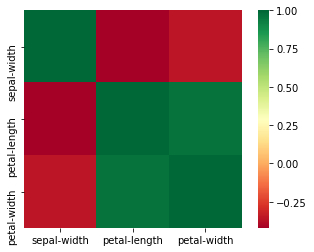

In [5]:
# Exploring the Iris data : Constructe a heatmap showing the correlation between the different features of the Iris dataset
sns.heatmap(dataset.corr(), square=True, cmap='RdYlGn');

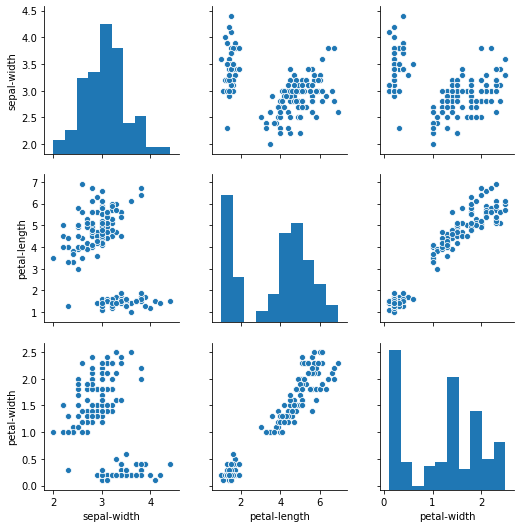

In [6]:
# Plot the histogram of all features
sns.pairplot(dataset,  diag_kind='hist', palette=['orange']);

In [7]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# show vectors with size
print('Train data shape :{}'.format(X_train.shape))
print('Test data shape  :{}'.format(X_test.shape))
print('Train label shape:{}'.format(y_train.shape))
print('Test label shape :{}'.format(y_test.shape))

Train data shape :(120, 3)
Test data shape  :(30, 3)
Train label shape:(120,)
Test label shape :(30,)


In [8]:
# Do data normalization or feature scaling as pre-processing 
from sklearn.preprocessing import StandardScaler

# Create the standard scaler : scaler
scaler = StandardScaler()

# fit scaler on train data
scaler.fit(X_train)

# transform scaler on train & test data
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Create the Kneighbors classifier : KNN
KNN = KNeighborsClassifier(n_neighbors=5)

# fit classifier on train data
KNN.fit(X_train, y_train)

# Compute predictions over the test: y_pred
y_pred = KNN.predict(X_test)

In [10]:
# evaluate classifier
from sklearn.metrics import confusion_matrix , classification_report

# print confusion matrix or error matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


#### show better confusion matrix :)

In [11]:
def plot_confusion_matrix(cm, classes, normalize=False, figsize=(12, 12), title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=12,fontweight="bold")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        annot = "%.2f" % cm[i, j] if cm[i, j] > 0 else "" 
        plt.text(j, i, annot, fontsize=10, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontweight="bold")
    plt.xlabel('Predicted label',fontweight="bold")

[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0.9]]


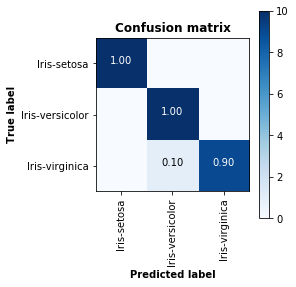

In [12]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix (cm,dataset['class'].unique(),normalize=True , figsize=(4,4));

In [13]:
# print classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [14]:
# Print R^2 over test data
print('R^2 score over test data is : {:.2f} %'.format(KNN.score(X_test, y_test)*100))

# Print R^2 over train data
print('R^2 score over train data is : {:.2f} %'.format(KNN.score(X_train, y_train)*100))

R^2 score over test data is : 96.67 %
R^2 score over train data is : 97.50 %


$𝑅^2$ over test data Obtained 96.67 % & over train data was 97.5 % so the model performed excelent on both train & test datasets.
:)

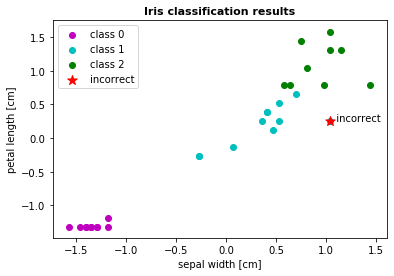

In [15]:
plt.figure(figsize=(6,4))

# Create a color pallet 
colors = ['m', 'c', 'g']

# Create array include index of False predict
incorrect_idx = np.where(y_pred!=y_test)[0]

# plot data
for n, color in enumerate(colors):

    idx = np.where(y_pred==dataset['class'].unique()[n])
    plt.scatter(X_test[idx,1] , X_test[idx,2], c=color , label="class %s"%str(n))

    
# plot incorrect prediction
plt.scatter(X_test[incorrect_idx,1] , X_test[incorrect_idx,2], color="r", label="incorrect", marker = '*', s=100)

# annotation of the incorrect point
plt.text(X_test[incorrect_idx,1], X_test[incorrect_idx,2],"  incorrect")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=2)
plt.title("Iris classification results",fontweight="bold", fontsize=11)
plt.show()